<a href="https://colab.research.google.com/github/samarjithMnagesha/pytorch/blob/main/Pytorch_basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a basic Neural Network Model


In [239]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np


In [240]:
#create a model class that in herits nn.module
class model(nn.Module):
  #input layer
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self, x):
    x=f.relu(self.fc1(x))
    x=f.relu(self.fc2(x))
    x=self.out(x)
    return x

In [241]:
torch.manual_seed(53)
#create am imstnce of model
model_test=model()

load data

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [243]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_fd=pd.read_csv(url)


In [244]:
my_fd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


converting string to integer


In [245]:
my_fd['species']=my_fd['species'].replace('setosa',0.00)
my_fd['species']=my_fd['species'].replace('versicolor',1.0)
my_fd['species']=my_fd['species'].replace('virginica',2.0)


In [246]:
x=my_fd.drop('species',axis=1)
y=my_fd['species']

Coverting into array

In [247]:
X=x.values
Y=y.values

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=53)

In [250]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [251]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [252]:
#set creiteria of model to measure ther error
ceiterion=nn.CrossEntropyLoss()
#chose Adam Optimizer, lrearning rate
optimizer=torch.optim.Adam(model_test.parameters(), lr=0.01)

In [253]:
#training the model
epochs=100
losses=[]
for i in range (epochs):
  y_pred=model_test.forward(X_train)
  loss=ceiterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
 # losses.append(loss.detach().numpy())losses.append(loss)
  if i%10==0:
    print(f'epoch: {i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 and loss: 1.106920599937439
epoch: 10 and loss: 0.9098309278488159
epoch: 20 and loss: 0.6043484210968018
epoch: 30 and loss: 0.3789325952529907
epoch: 40 and loss: 0.2173517644405365
epoch: 50 and loss: 0.11661840975284576
epoch: 60 and loss: 0.06883154064416885
epoch: 70 and loss: 0.04712279886007309
epoch: 80 and loss: 0.03657086566090584
epoch: 90 and loss: 0.030620131641626358


Text(0, 0.5, 'loss')

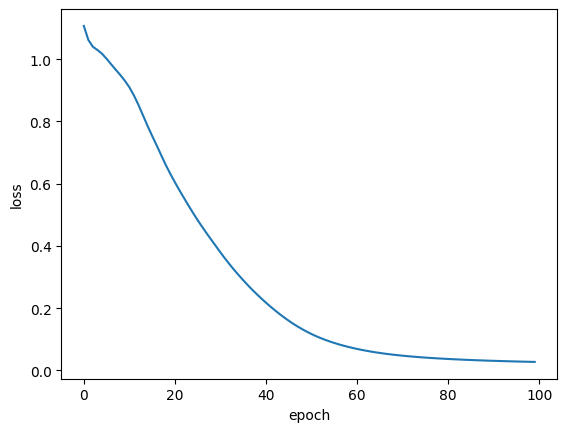

In [254]:
 plt.plot(range(epochs), losses)
 plt.xlabel('epoch')
 plt.ylabel('loss')

In [255]:
#evaluate testdata and model
with torch.no_grad():
  y_eval=model_test.forward(X_test)
  loss=ceiterion(y_eval, y_test)

In [256]:
loss

tensor(0.1917)

In [257]:
correct=0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model_test.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([ 5.2358,  0.3390, -6.6291])    0
 2. tensor([ 5.4149,  0.6498, -7.2369])    0
 3. tensor([-16.1617,  -3.3429,  13.1437]) 2
 4. tensor([-4.6642,  3.1790, -1.5095])    1
 5. tensor([-5.1737,  4.0128, -2.1878])    1
 6. tensor([-12.2964,  -0.3866,   7.3131]) 2
 7. tensor([-8.2127,  1.2910,  2.8625])    2
 8. tensor([ 4.6990,  0.6987, -6.4647])    0
 9. tensor([-6.0616,  2.1995,  0.4856])    1
10. tensor([-11.5952,  -0.8876,   7.4833]) 2
11. tensor([ 6.0109,  0.4940, -7.6456])    0
12. tensor([-3.6736,  3.8681, -3.1306])    1
13. tensor([-8.7475,  0.5626,  4.0457])    1
14. tensor([ 5.3072,  0.5249, -6.9694])    0
15. tensor([-12.6858,  -1.2084,   8.5105]) 2
16. tensor([-2.3511,  3.3184, -3.4274])    1
17. tensor([-6.5456,  2.4679,  0.4704])    1
18. tensor([-7.7859,  1.5127,  2.3413])    2
19. tensor([-11.4731,  -0.5849,   7.0441]) 2
20. tensor([ 5.8864,  0.2928, -7.2974])    0
21. tensor([-7.5439,  1.3785,  2.3489])    1
22. tensor([-10.9029,  -0.3646,   6.4389]) 2
23. tensor

In [258]:
new_iris=torch.tensor([5.6,3.7,2.2,1.5])

In [260]:
with torch.no_grad():
  print(model_test.forward(new_iris))
  print(model_test.forward(new_iris).argmax().item())
  if model_test.forward(new_iris).argmax().item()==0:
    print('setosa')
  elif model_test.forward(new_iris).argmax().item()==1:
    print('versicolor')
  else:
    print('virginica')

tensor([ 3.7564,  1.5730, -6.9116])
0
setosa
